In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\KB VIMAL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'potato_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5702 files belonging to 3 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'potato_valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1426 files belonging to 3 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\KB VIMAL\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [17]:
from tensorflow.keras.optimizers import Adam

cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

In [20]:

training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.3850 - loss: 2.7973 - val_accuracy: 0.4495 - val_loss: 1.1046
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 945s 5s/step - accuracy: 0.6310 - loss: 0.8085 - val_accuracy: 0.6185 - val_loss: 0.8123
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.7197 - loss: 0.6196 - val_accuracy: 0.9060 - val_loss: 0.2673
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.8723 - loss: 0.3285 - val_accuracy: 0.9081 - val_loss: 0.2493
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.9471 - loss: 0.1635 - val_accuracy: 0.9677 - val_loss: 0.0999
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9499 - loss: 0.1447 - val_accuracy: 0.9741 - val_loss: 0.0867
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9541 - loss: 0.1343 - val_accuracy: 0.9712 - val_loss: 0.0806
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9601 - loss: 0.1267 - val_accu

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.9859 - loss: 0.0442
Training accuracy: 0.985619068145752


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.9732 - loss: 0.0700
Validation accuracy: 0.9796633720397949


In [24]:
cnn.save('trained_potato_plant_disease_model.keras')

In [25]:
training_history.history

{'accuracy': [0.40845316648483276,
  0.6534548997879028,
  0.8039284348487854,
  0.9054717421531677,
  0.9526482224464417,
  0.9642230868339539,
  0.957383394241333,
  0.9494913816452026,
  0.9779024720191956,
  0.980006992816925],
 'loss': [1.4190279245376587,
  0.757315456867218,
  0.4815928637981415,
  0.2511771023273468,
  0.1458868533372879,
  0.10576466470956802,
  0.12928199768066406,
  0.16873501241207123,
  0.07596195489168167,
  0.05937787890434265],
 'val_accuracy': [0.4495091140270233,
  0.6185133457183838,
  0.9060308337211609,
  0.9081346392631531,
  0.9677419066429138,
  0.9740533232688904,
  0.9712482690811157,
  0.9817671775817871,
  0.9775596261024475,
  0.9796633720397949],
 'val_loss': [1.1046397686004639,
  0.8122656345367432,
  0.26731762290000916,
  0.24931682646274567,
  0.0999436154961586,
  0.08665934950113297,
  0.08058188110589981,
  0.06639185547828674,
  0.10312598198652267,
  0.05447161942720413]}

In [26]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy visualization

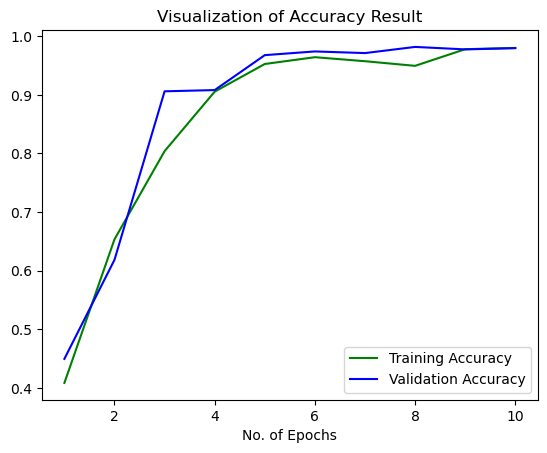

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'potato_valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1426 files belonging to 3 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1426/1426 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step


In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [34]:
Y_true

<tf.Tensor: shape=(1426,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [35]:
predicted_categories

<tf.Tensor: shape=(1426,), dtype=int64, numpy=array([0, 1, 0, ..., 2, 2, 2], dtype=int64)>

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [37]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.97      0.98       485
 Potato___Late_blight       0.95      1.00      0.97       485
     Potato___healthy       1.00      0.97      0.99       456

             accuracy                           0.98      1426
            macro avg       0.98      0.98      0.98      1426
         weighted avg       0.98      0.98      0.98      1426



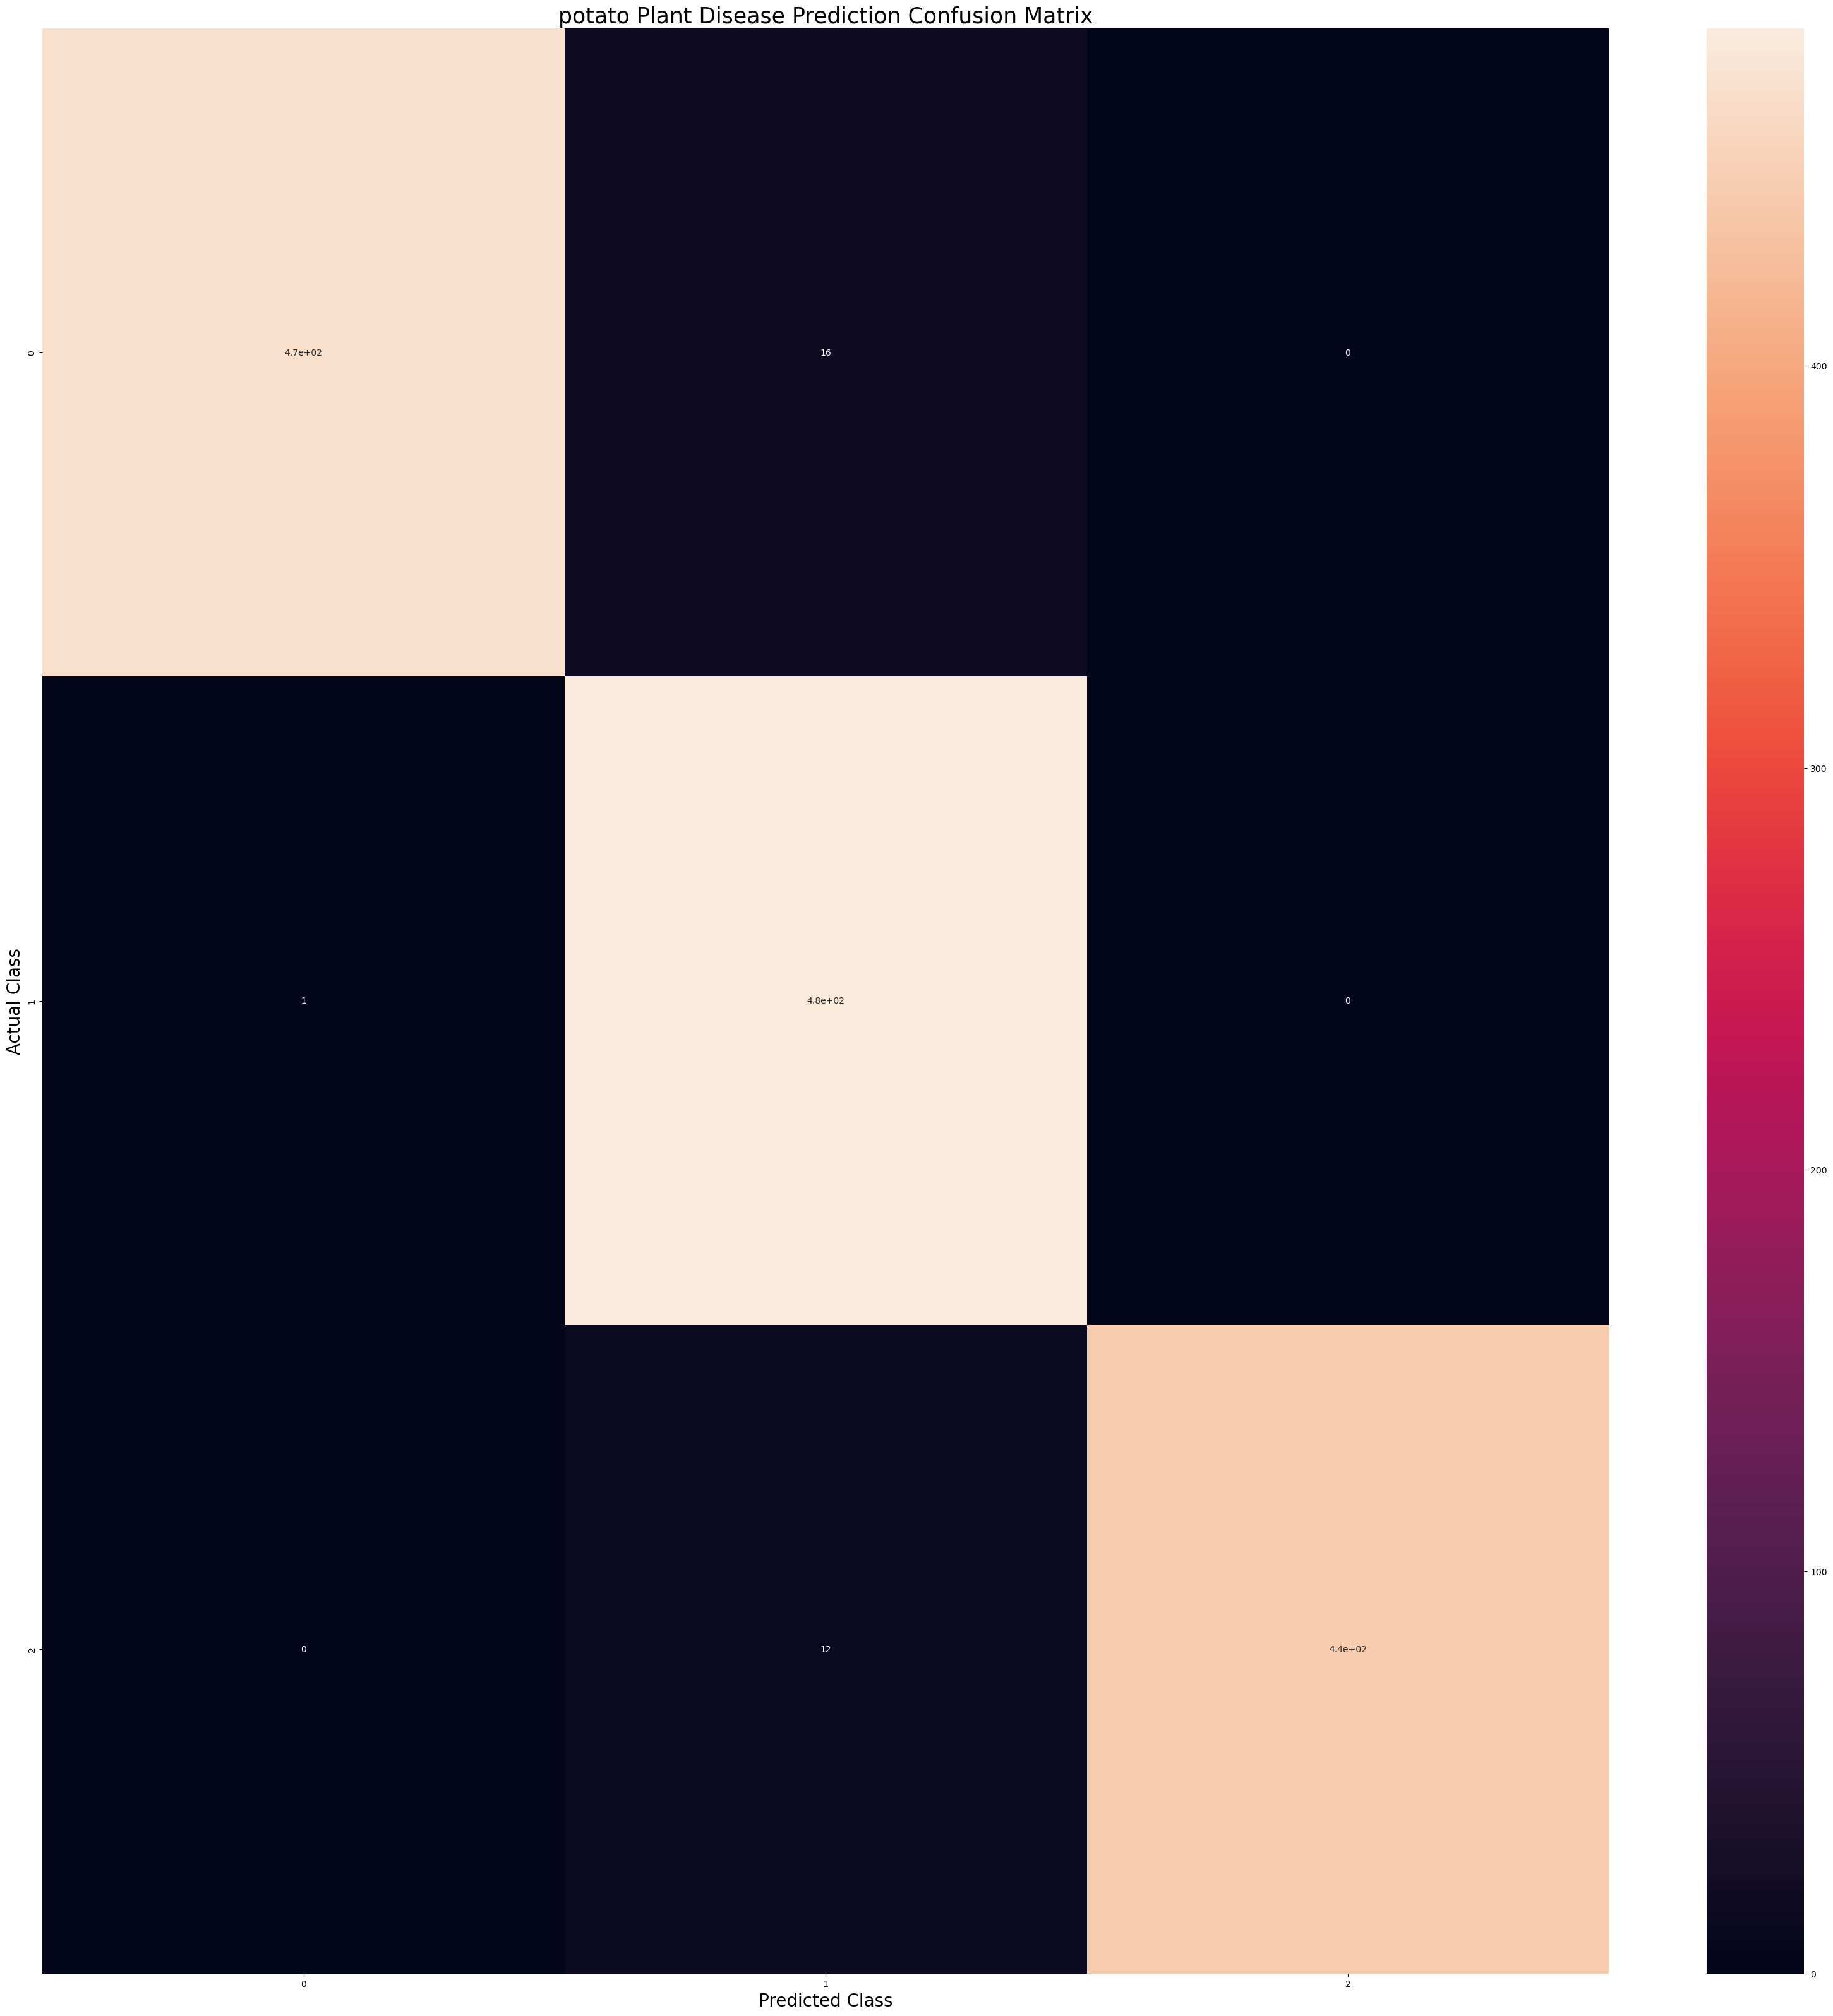

In [39]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('potato Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()